# YULU Business Case

## Problem Statement
### Undestand which are the factors that significantly affect the demand for shared electric cycles in india market and also extent of impact of these factors

In [1098]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

from statsmodels.graphics.gofplots import qqplot

In [1099]:
data=pd.read_csv('yulu.txt')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [1100]:
data.shape

(10886, 12)

In [1101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [1102]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [1103]:
data.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [1104]:
data.isnull().sum()  ## no null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [1105]:
data['datetime']=pd.to_datetime(data['datetime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [1106]:
data['datetime'].nunique()

10886

In [1107]:
# creating bins for seasons

start=[0,1,2,3,4]
labels=['spring','summer','fall','winter']
data['season_cat']=pd.cut(data['season'], bins=start, labels=labels)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,spring


In [1108]:
data['season_cat'].value_counts(normalize=True)*100

winter    25.114826
summer    25.105640
fall      25.105640
spring    24.673893
Name: season_cat, dtype: float64

In [1109]:
# there are approx equal numbers of records for each season

In [1110]:
data.groupby('season_cat')['count'].sum()

season_cat
spring    312498
summer    588282
fall      640662
winter    544034
Name: count, dtype: int64

<BarContainer object of 4 artists>

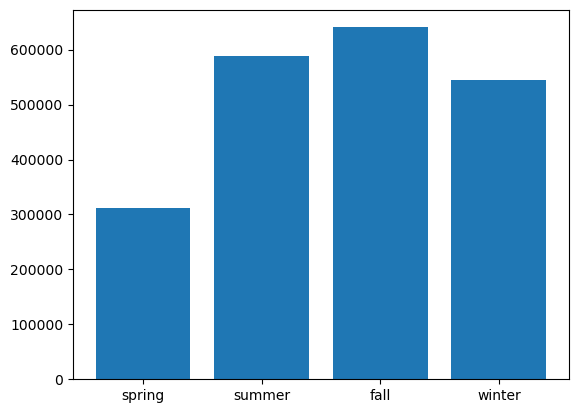

In [1111]:
## count vs season

season_count=data.groupby('season_cat')['count'].sum()
x_bar=season_count.index
y_bar=season_count
plt.bar(x_bar,y_bar)

In [1112]:
# count of total rides during each season
# Fall has highest demand, followed by summer, winnter and spring

In [1113]:
data['holiday'].value_counts()  

0    10575
1      311
Name: holiday, dtype: int64

In [1114]:
data.groupby('holiday')['count'].sum()

holiday
0    2027668
1      57808
Name: count, dtype: int64

<BarContainer object of 2 artists>

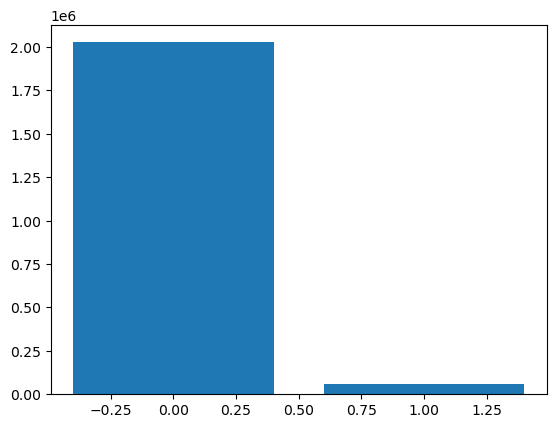

In [1115]:
## count vs holiay

holiday_count=data.groupby('holiday')['count'].sum()
x_bar=holiday_count.index
y_bar=holiday_count
plt.bar(x_bar,y_bar)

In [1116]:
# most rides happen on non holidays-about 97% and only 3% on holidays

In [1117]:
data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [1118]:
data.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

<BarContainer object of 2 artists>

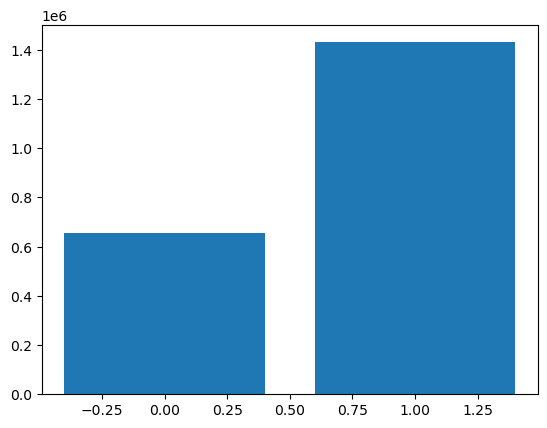

In [1119]:
## count vs working day

workingday_count=data.groupby('workingday')['count'].sum()
x_bar=workingday_count.index
y_bar=workingday_count
plt.bar(x_bar,y_bar)

In [1120]:
# usage was more on working days than non working days-  avg demand for working days are 153 and for non working its 120

In [1121]:
# creating categorical bins for the weather

start=[0,1,2,3,4]
labels=['clear','mist','snow','heavy_rain']
data['weather_cat']=pd.cut(data['weather'], bins=start, labels=labels)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_cat,weather_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring,clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring,clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring,clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,spring,clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,spring,clear


In [1122]:
data.groupby('weather_cat')['count'].sum()

weather_cat
clear         1476063
mist           507160
snow           102089
heavy_rain        164
Name: count, dtype: int64

<BarContainer object of 4 artists>

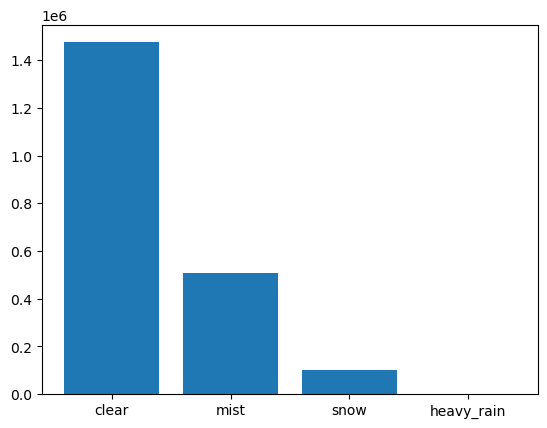

In [1123]:
## count vs weather

weather_cat_count=data.groupby('weather_cat')['count'].sum()
x_bar=weather_cat_count.index
y_bar=weather_cat_count
plt.bar(x_bar,y_bar)

In [1124]:
# most rides are when weather is clear/few clouds/partly cloudy
# negligible rides during heavy rains/thunderstorm/snow


### Ranges for each non categorical variables

In [1126]:
# range for temp
data['temp'].aggregate({'min','max'}).reset_index()

,index,temp
0,max,41.00
1,min,0.82


In [1127]:
# range for atemp
data['atemp'].aggregate({'min','max'}).reset_index()

,index,atemp
0,max,45.455
1,min,0.760


In [1128]:
# range for humidity
data['humidity'].aggregate({'min','max'}).reset_index()

,index,humidity
0,max,100
1,min,0


In [1129]:
# range for windspeed
data['windspeed'].aggregate({'min','max'}).reset_index()

,index,windspeed
0,max,56.9969
1,min,0.0000


In [1130]:
# range for casual
data['casual'].aggregate({'min','max'}).reset_index()

,index,casual
0,max,367
1,min,0


In [1131]:
# range for registered
data['registered'].aggregate({'min','max'}).reset_index()

,index,registered
0,max,886
1,min,0


In [1132]:
# range for count
data['count'].aggregate({'min','max'}).reset_index()

,index,count
0,max,977
1,min,1


### removing outliers

<AxesSubplot:ylabel='count'>

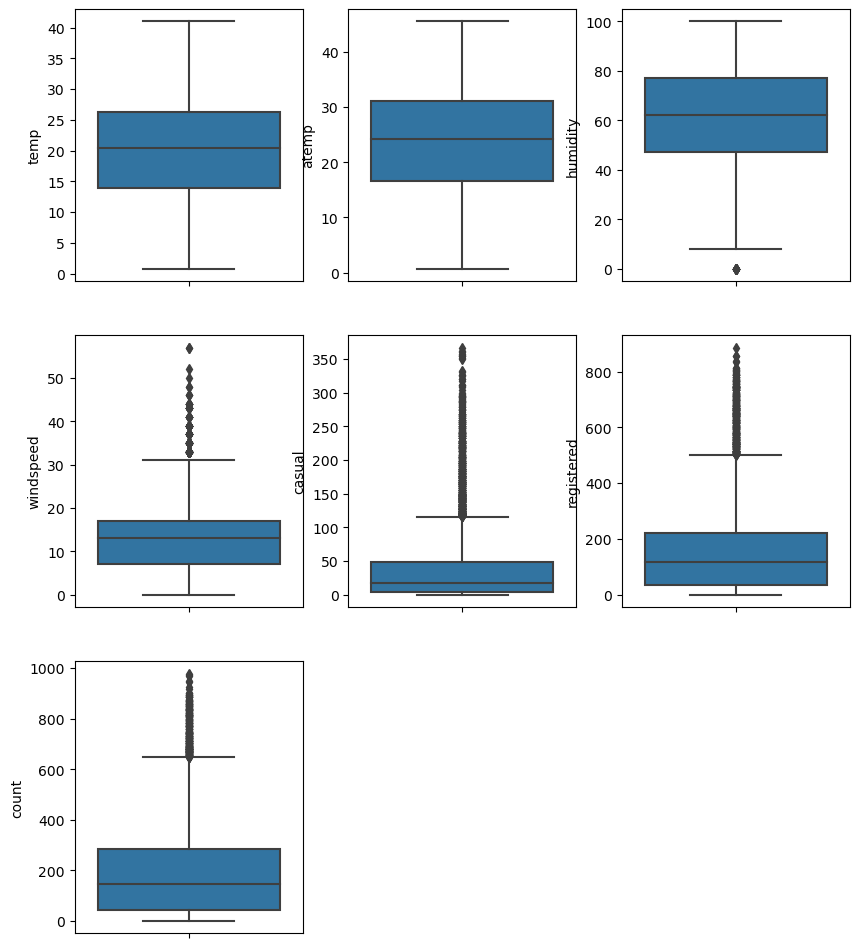

In [1133]:
plt.figure(figsize=(10,12))
plt.subplot(3,3,1)
sns.boxplot(data=data, y='temp')

plt.subplot(3,3,2)
sns.boxplot(data=data, y='atemp')

plt.subplot(3,3,3)
sns.boxplot(data=data, y='humidity')

plt.subplot(3,3,4)
sns.boxplot(data=data, y='windspeed')

plt.subplot(3,3,5)
sns.boxplot(data=data, y='casual')

plt.subplot(3,3,6)
sns.boxplot(data=data, y='registered')

plt.subplot(3,3,7)
sns.boxplot(data=data, y='count')

In [1134]:
# Insight

# there are lot of outliers in windspeed, casusla, registered and count.

In [1135]:
median=data['windspeed'].median()
mean=data['windspeed'].mean()
median, mean

(12.998, 12.799395406945093)

In [1136]:
# Removing Outliers from windspeed- based on IQR

IQR=np.percentile(data['windspeed'],75)-np.percentile(data['windspeed'],25)
Upper_whisker=(np.percentile(data['windspeed'],75)+(1.5*IQR))
Lower_whisker=max((np.percentile(data['windspeed'],25)-(1.5*IQR), min(data['windspeed'])))
data=data[data['windspeed']<=Upper_whisker]

In [1137]:
median=data['casual'].median()
mean=data['casual'].mean()
median, mean

(17.0, 36.02035838258748)

In [1138]:
# Removing Outliers from casual of rides- based on IQR

IQR=np.percentile(data['casual'],75)-np.percentile(data['casual'],25)
Upper_whisker=(np.percentile(data['casual'],75)+(1.5*IQR))
Lower_whisker=max((np.percentile(data['casual'],25)-(1.5*IQR), min(data['casual'])))
data=data[data['casual']<=Upper_whisker]

In [1139]:
median=data['registered'].median()
mean=data['registered'].mean()
median, mean

(107.0, 145.3569844789357)

In [1140]:
# Removing Outliers from registered of rides- based on IQR

IQR=np.percentile(data['registered'],75)-np.percentile(data['registered'],25)
Upper_whisker=(np.percentile(data['registered'],75)+(1.5*IQR))
Lower_whisker=max((np.percentile(data['registered'],25)-(1.5*IQR), min(data['registered'])))
data=data[data['registered']<=Upper_whisker]

In [1141]:
median=data['count'].median()
mean=data['count'].mean()
median, mean

(119.0, 144.27151824662198)

In [1142]:
# Removing Outliers from count of rides- based on IQR

IQR=np.percentile(data['count'],75)-np.percentile(data['count'],25)
Upper_whisker=(np.percentile(data['count'],75)+(1.5*IQR))
Lower_whisker=max((np.percentile(data['count'],25)-(1.5*IQR), min(data['count'])))
data=data[data['count']<=Upper_whisker]

In [1143]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9381.000000,9381.000000,9381.000000,9381.000000,9381.000000,9381.000000,9381.000000,9381.000000,9381.000000,9381.000000,9381.000000
mean,2.493657,0.026756,0.709626,1.438759,19.492591,22.884999,63.726468,12.117266,23.416693,120.118218,143.534911
std,1.138157,0.161379,0.453959,0.644483,7.659549,8.339502,18.886633,7.442063,26.625409,105.701992,123.165154
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,49.000000,7.001500,3.000000,27.000000,32.000000
50%,2.000000,0.000000,1.000000,1.000000,18.860000,22.725000,65.000000,11.001400,12.000000,98.000000,118.000000
75%,4.000000,0.000000,1.000000,2.000000,25.420000,30.305000,79.000000,16.997900,36.000000,182.000000,224.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,31.000900,116.000000,456.000000,514.000000


<AxesSubplot:ylabel='count'>

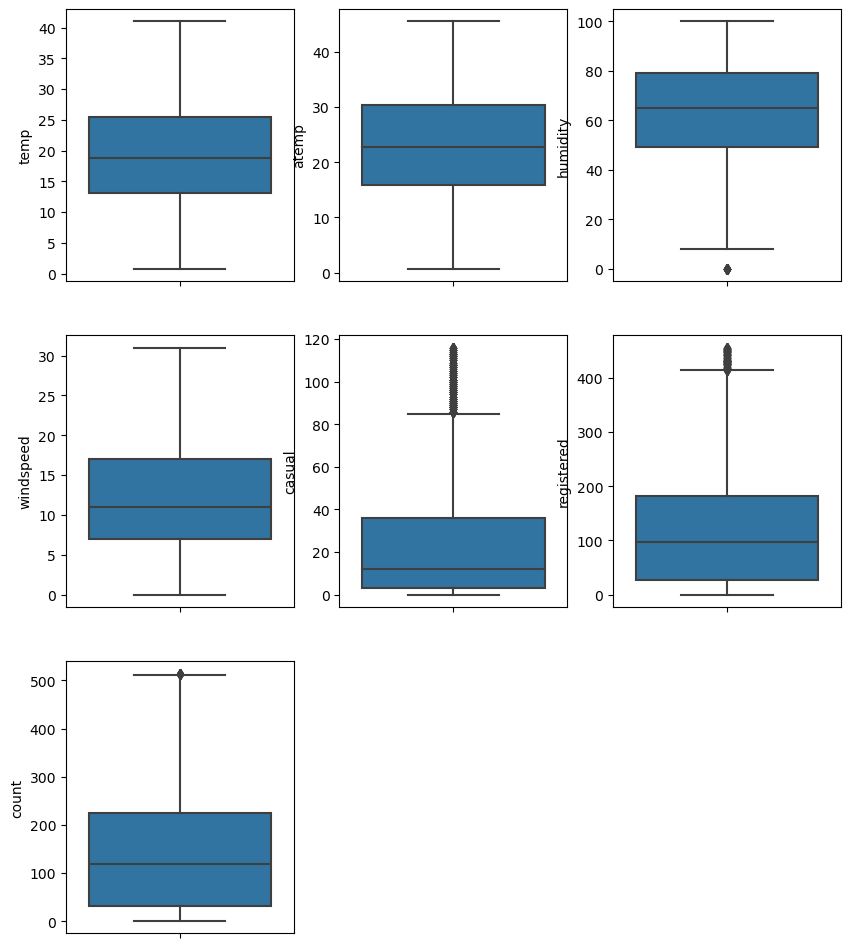

In [1144]:
plt.figure(figsize=(10,12))
plt.subplot(3,3,1)
sns.boxplot(data=data, y='temp')

plt.subplot(3,3,2)
sns.boxplot(data=data, y='atemp')

plt.subplot(3,3,3)
sns.boxplot(data=data, y='humidity')

plt.subplot(3,3,4)
sns.boxplot(data=data, y='windspeed')

plt.subplot(3,3,5)
sns.boxplot(data=data, y='casual')

plt.subplot(3,3,6)
sns.boxplot(data=data, y='registered')

plt.subplot(3,3,7)
sns.boxplot(data=data, y='count')

In [1145]:
# Insight

# even after removing outliers with IQR, there still some outliers left in caxual, registered and count.

In [1146]:
data['temp'].aggregate({'max','min'})

max    41.00
min     0.82
Name: temp, dtype: float64

In [1147]:
bins=[0,11,20,30,45]
labels=['very_low','low','medium','high']
data['temp_cat']=pd.cut(data['temp'], bins=bins, labels=labels)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_cat,weather_cat,temp_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring,clear,very_low
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring,clear,very_low
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring,clear,very_low
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,spring,clear,very_low
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,spring,clear,very_low


In [1148]:
data['atemp'].aggregate({'max','min'})

max    45.455
min     0.760
Name: atemp, dtype: float64

In [1149]:
bins=[0,11,20,30,46]
labels=['very_low','low','medium','high']
data['atemp_cat']=pd.cut(data['atemp'], bins=bins, labels=labels)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_cat,weather_cat,temp_cat,atemp_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring,clear,very_low,low
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring,clear,very_low,low
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring,clear,very_low,low
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,spring,clear,very_low,low
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,spring,clear,very_low,low


In [1150]:
data['humidity'].aggregate({'max','min'})

max    100
min      0
Name: humidity, dtype: int64

In [1219]:
bins=[0,30,51,70,100]
labels=['low','medium','high','very_high']
data['humidity_cat']=pd.cut(data['humidity'], bins=bins, labels=labels)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_cat,weather_cat,temp_cat,atemp_cat,humidity_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring,clear,very_low,low,very_high
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring,clear,very_low,low,very_high
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring,clear,very_low,low,very_high
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,spring,clear,very_low,low,very_high
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,spring,clear,very_low,low,very_high


<AxesSubplot:xlabel='temp', ylabel='atemp'>

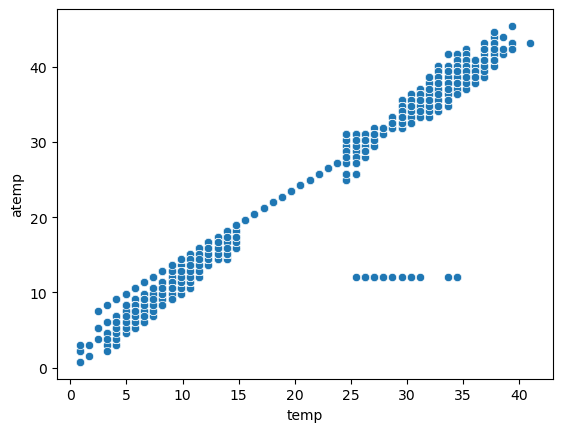

In [1152]:
sns.scatterplot(data=data, x='temp', y='atemp')

In [1153]:
# Insight 

# We can see a clear correlation between temp and atemp

<AxesSubplot:xlabel='atemp', ylabel='humidity'>

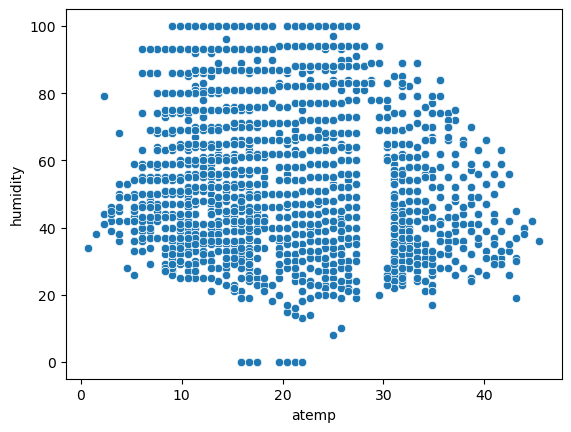

In [1154]:
sns.scatterplot(data=data, x='atemp', y='humidity')

In [1191]:
# Insight 

# There is no correlation between temp/atemp and humidity

<AxesSubplot:xlabel='windspeed', ylabel='count'>

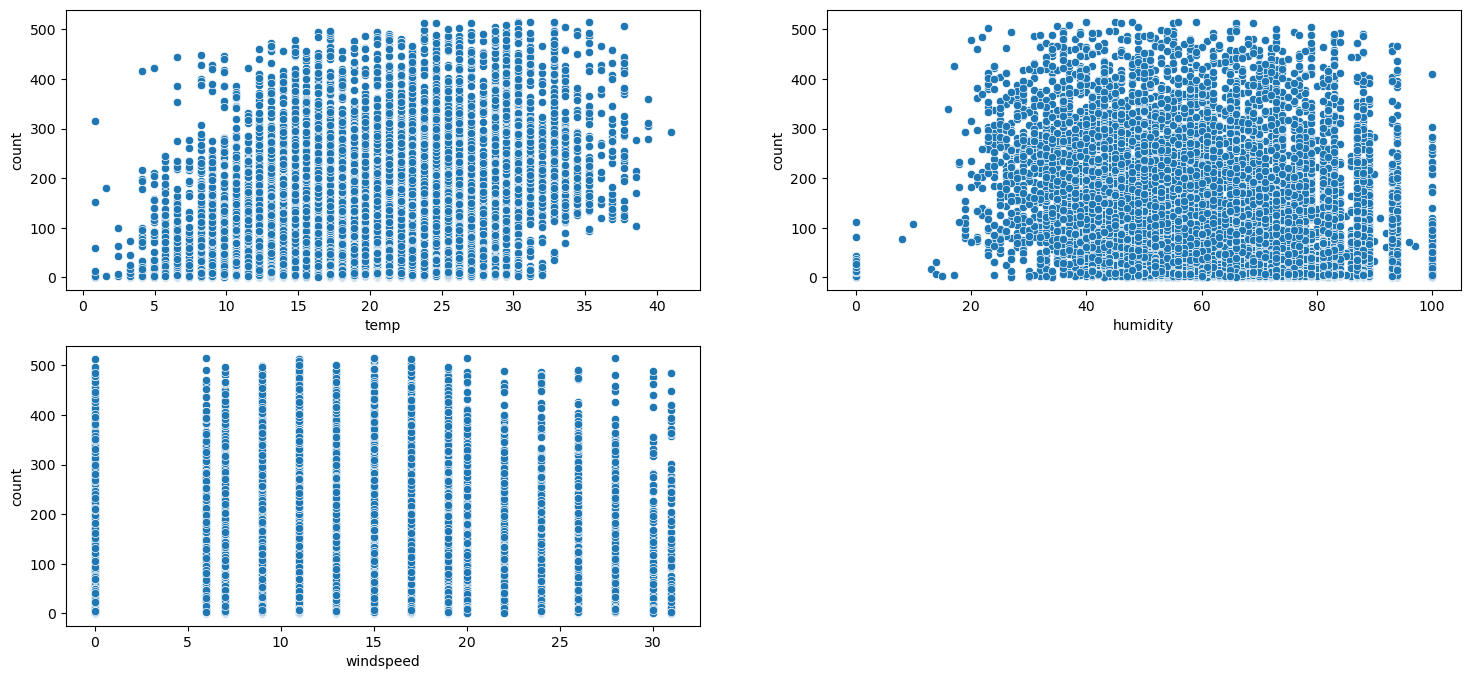

In [1215]:
plt.figure(figsize=(18,8))

# temp vs count
plt.subplot(2,2,1)
sns.scatterplot(data=data, x='temp', y='count')

# humidity vs count
plt.subplot(2,2,2)
sns.scatterplot(data=data, x='humidity', y='count')

# windspeed vs count
plt.subplot(2,2,3)
sns.scatterplot(data=data, x='windspeed', y='count')

In [ ]:
# Insight

# There is slightly +ve correlation between the temp and count of cycle demand but most cycle demand is in range 15 to 30
# There is no correlation between the humidity and count of cycle demand but people perfer cycle when humdity is above 25
# There is no correlation between the windspeed and count of cycle demand

<AxesSubplot:xlabel='count', ylabel='registered'>

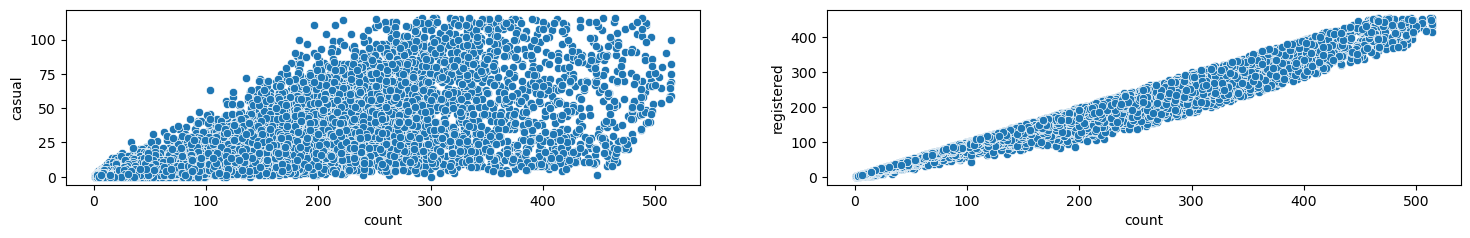

In [1206]:
plt.figure(figsize=(18,5))

# casual vs count
plt.subplot(2,2,1)
sns.scatterplot(data=data, x='count', y='casual')

# registered vs count
plt.subplot(2,2,2)
sns.scatterplot(data=data, x='count', y='registered')

In [1222]:
casual_user=data['casual'].sum()
registered_users=data['registered'].sum()
casual_user,registered_users

(219672, 1126829)

In [1226]:
per_of_registered_users=registered_users*100/(casual_user+registered_users)
per_of_registered_users

83.68571579226455

In [1227]:
per_of_casual_user=casual_user*100/(casual_user+registered_users)
per_of_casual_user

16.314284207735458

In [ ]:
# Insight

# There is a good postive correlation between causal and count but registred has a very high +ve correlation with count

# Hypothesis Testing 

# Working day vs Electric cycle demand--T-Test_ind

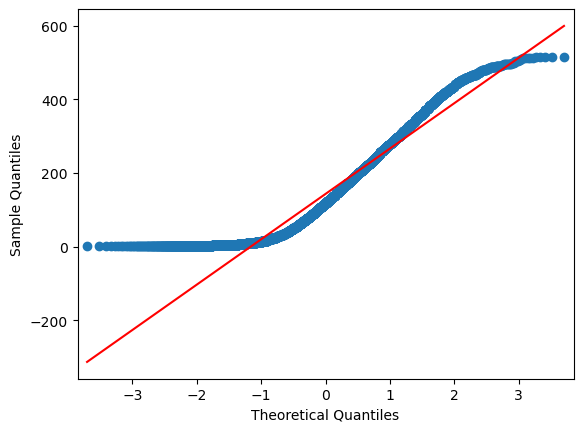

In [1156]:
qqplot(data['count'], line='s')
plt.show()

In [1157]:
# data does not follow gaussian distribution

In [1158]:
workingday=data[data['workingday']==1]
non_workingday=data[data['workingday']==0]

# significance level alpha=5%

# Ho : Working day has no effect on demand of electric cycles- mu(working)=mu(non_working)
# Ha : Working day has a postive effect on demand of elctric cycle- mu(working)>mu(non_working)

In [1159]:
t_val, p_val=ttest_ind(workingday['count'],non_workingday['count'],alternative='greater')
print('t_stat :',t_val)
print('p_value :',p_val)
if p_val<0.05:
    print('Reject Ho')
    print('At 5% significance- Working day has effect on electric cycles rented')
else:
    print('Fail to Reject Ho')
    print('Working day has no effect on electric cycles rented')

t_stat : 11.889062855555439
p_value : 1.1514633983326891e-32
Reject Ho
At 5% significance- Working day has effect on electric cycles rented


In [1160]:
# Inference

# At 5% significance we can say that the working day has a +ve an effect on the demand of electric cycle than non working day

# Weather vs Electric cycles demand-Annova

In [1161]:
clear=data[data['weather']==1]['count']
mist=data[data['weather']==2]['count']
light_snow=data[data['weather']==3]['count']
heavy_rain=data[data['weather']==4]['count']

### checking assumptions for annova

In [1162]:
# cannot use Shapiro wilk test as the data has more than 200 entries.

In [1163]:
# Assumption 1. data should be gaussian

<AxesSubplot:xlabel='count', ylabel='Count'>

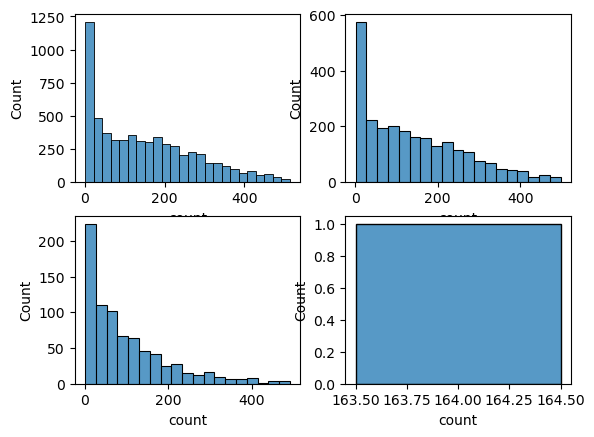

In [1164]:
plt.subplot(2,2,1)
sns.histplot(clear)

plt.subplot(2,2,2)
sns.histplot(mist)

plt.subplot(2,2,3)
sns.histplot(light_snow)

plt.subplot(2,2,4)
sns.histplot(heavy_rain)

In [1165]:
### data does not follow gaussian

In [1166]:
# Assumption 2. Data is independent of eachother- data is independent

In [1167]:
    # Assumption 3. Equal variance for each group

In [1168]:
from scipy.stats import levene

# Ho : Variance are equal
# Ha : Variance are not equal
levene_stat, p_value=levene(clear, mist, light_snow,heavy_rain)
print(levene_stat)
print(p_value)

if p_value<0.05:
    print('Reject Ho')
    print('Variance are not equal')
else:
    print('Fail to reject Ho')
    print('Variance are equal')

42.139746595594744
4.843747473486193e-27
Reject Ho
Variance are not equal


In [1169]:
# at 5% significance we can say that the data doesnt have equal variance. Hence 3rd assumption fails

### Annova

In [1170]:
# significance level alpha=5%

# Ho : All weather have same cycle demand
# Ha : 1 or more weather have diff cycle demand

In [1171]:
f_stat, p_val=f_oneway(clear, mist, light_snow,heavy_rain)

print('f_stat :',f_stat)
print('p_value :',p_val)
if p_val<0.05:
    print('Reject Ho')
    print('1 or more Weather have diff cycle demand')
else:
    print('Fail to Reject Ho')
    print('All weather have same cycle demand')

f_stat : 41.01225482281913
p_value : 2.5369706888443477e-26
Reject Ho
1 or more Weather have diff cycle demand


In [1172]:
# Inference

# At 5% significance level we can say that 1 or more weather has an effect on cycle demand

# Season vs Electric cycle demand- Annova

In [1173]:
spring=data[data['season']==1]['count']
summer=data[data['season']==2]['count']
fall=data[data['season']==3]['count']
winter=data[data['season']==4]['count']

### checking assumptions for annova

In [1174]:
# Assumption 1. data should be gaussian

<AxesSubplot:xlabel='count', ylabel='Count'>

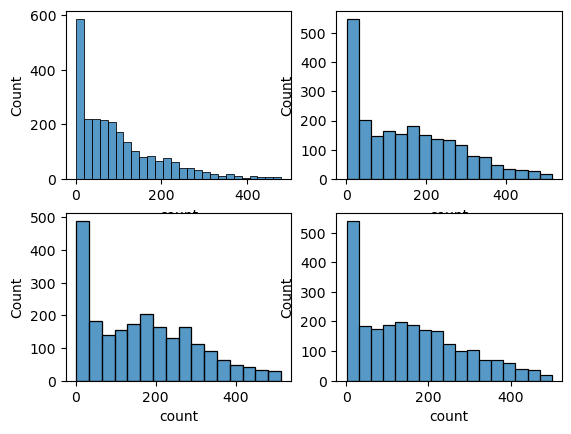

In [1175]:
plt.subplot(2,2,1)
sns.histplot(spring)

plt.subplot(2,2,2)
sns.histplot(summer)

plt.subplot(2,2,3)
sns.histplot(fall)

plt.subplot(2,2,4)
sns.histplot(winter)

In [1176]:
### data does not follow gaussian

In [1177]:
# Assumption 2. Data is independent of eachother- data is independent

In [1178]:
# Assumption 3. Equal variance for each group

In [1179]:
from scipy.stats import levene

# Ho : Variance are equal
# Ha : Variance are not equal
levene_stat, p_value=levene(spring, summer, fall,winter)
print(levene_stat)
print(p_value)

if p_value<0.05:
    print('Reject Ho')
    print('Variance are not equal')
else:
    print('Fail to reject Ho')
    print('Variance are equal')

138.09834574958816
1.479015830333895e-87
Reject Ho
Variance are not equal


In [1180]:
# at 5% significance we can say that the data doesnt have equal variance. Hence 3rd assumption fails

### Annova

In [1181]:
# significance level alpha=5%

# Ho : All season have same cycle demand
# Ha : 1 or more season have diff cycle demand

In [1182]:
f_stat, p_val=f_oneway(spring, summer, fall,winter)

print('f_stat :',f_stat)
print('p_value :',p_val)
if p_val<0.05:
    print('Reject Ho')
    print('1 or more season have diff cycle demand')
else:
    print('Fail to Reject Ho')
    print('All seasons have same cycle demand')

f_stat : 152.6580670450832
p_value : 1.3408812678211875e-96
Reject Ho
1 or more season have diff cycle demand


In [1183]:
# Inference

# At 5% significance we can say 1 or more season have different cycle demand.

# Weather vs Season- Chi_square test

In [1184]:
vals=pd.crosstab(data['weather'],data['season'])
vals

season,1,2,3,4
weather,,,,
1,1582,1436,1557,1482
2,682,610,499,742
3,203,203,173,211
4,1,0,0,0


In [1185]:
# Assumption

# 1. Variables are categorical--- Yes
# 2. Each observation is independent--Yes
# 3. Each cell is Mutually exclusive-- Yes
# 4. The expected value is each cell is greater than 5----No

In [1186]:
# Ho : weather is not dependent on season
# Ha : weather is dependent on season

# significance level alpha=5%

In [1187]:
chi_stat, p_value, df, expected=chi2_contingency(vals)
print('chi_stat :',chi_stat)
print('p_value :',p_value)
if p_value<0.05:
    print('Reject Ho')
    print('weather is dependent on season')
else:
    print('Fail to Reject Ho')
    print('weather is not dependent on season')

chi_stat : 49.11735823421667
p_value : 1.5778137220034608e-07
Reject Ho
weather is dependent on season


In [1216]:
# Inference

# At 5% significance we can say weather is dependent on season.

### Correlation Matrix

<AxesSubplot:>

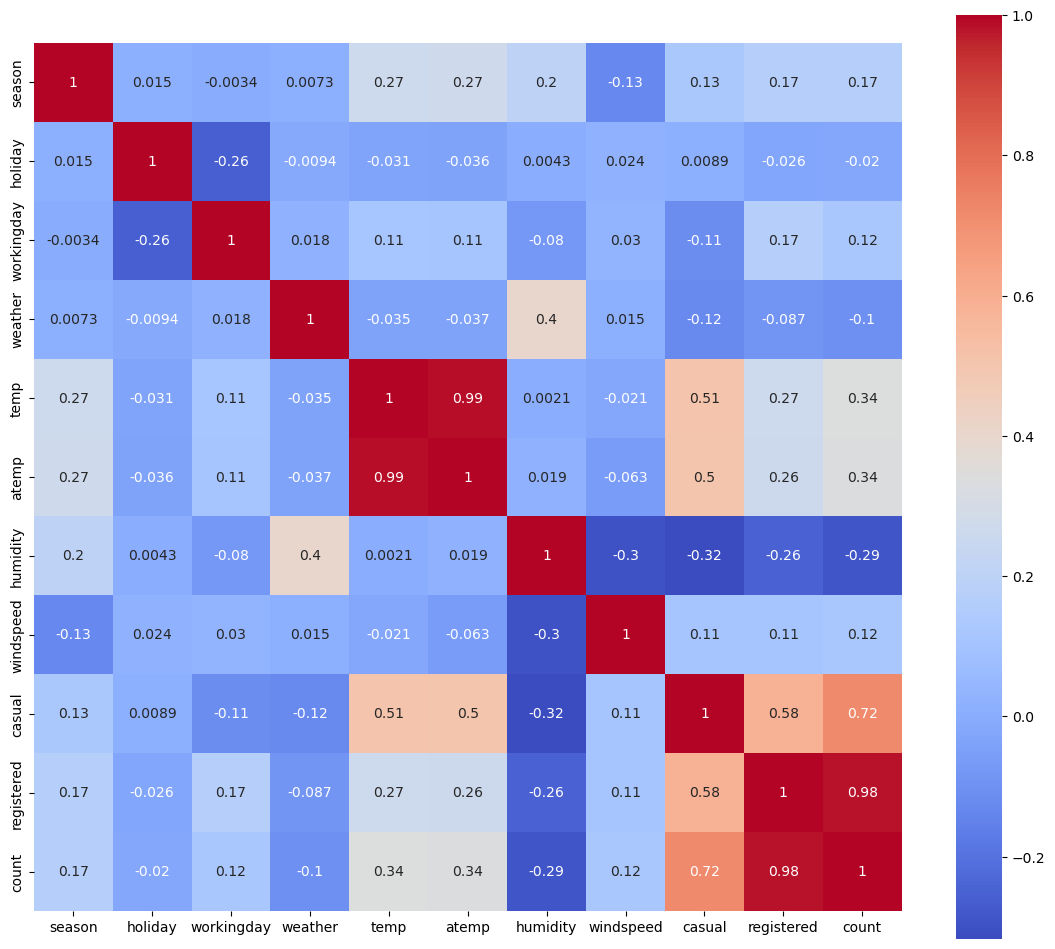

In [1217]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(method="pearson"),square=True,annot=True,cmap="coolwarm")

In [ ]:
# Insights

# count has good +ve correlation with casual users but even a higher correlation between registered users.
# count has slight +ve correlation with the temp and temp
# humidty has a slightly negative correlation with the count.
# casual user have a slightly better +ve correlation with temp and atemp compared to that of registered users.
# causal users prefer yulu when temp is slightly higher and humidity is much lower than that of registred users.

# Final Insights

In [1228]:
# Final Insights

# 83% of the riders are registered users and only 16% of riders are casuals users
# Fall has highest demand, followed by summer, winnter and spring-seasonal demand
# Most rides happen on non holidays-about 97% and only 3% on holidays
# Usage was more on working days than non working days-avg demand for working days is 153 and for non working its 120
# Most rides are prefered when weather is clear and almost no rides have been taken when weather is heavy raining.
# There is slightly +ve correlation between the temp and count of cycle demand and most cycle demand is in range 15 to 30 degree celcius
# Working day, weather and season have a significant effect on the demand of electric cycles.
# causal users prefer yulu when temp is slightly higher and humidity is much lower than that of registred users.
# At 95% significance we can say weather and season are dependent on each other

In [ ]:
# Recommendation

# Factors that effect cycle demand are- no of registered user, Holiday, Workingday, weather.

# Yulu should focus on registred users as most of their users are registered and are major source of income. Engagment should be high for these customers. Any dip in thes users should be addressed with customer feedback etc.
# The no of casual users are very less. Increase in casual users can help tap the new segment of customers. 
# As majority of the rides are on non holidays and workig days, most of the users could be office goers or bsuiness people/employees.
# Inventory should be planned and maintained according. Example- nearby a IT park, office space, metro stations,bus stands, warehouses.
# Since their demand is seasonal, marketing campaigns should plan and target heavily in Fall and summer.
# Since the usage is almost zero during heavy rain and low during snow, Yulu can provide reusable rain coats to the riders for hassle free travel 